## Visualizations Per Territory

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_excel("../data/brasil.xlsx", sheet_name="Territorios_operações")
# Remove first rows that have no data
df = df.iloc[12:]
df = df.fillna(0)



# Convert date to standard date format
df['yearmo'] = pd.to_datetime(df['yearmo'].str.replace('m', '-'), format='%Y-%m').dt.strftime('%b %Y')
df.describe()

/tmp/ipykernel_165826/1109227718.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


,Mortes - GCA,Morte_policial,Feridos - GCA,feridos_polícia,TCP - Morte GCA,TCP - Morte Polícia,TCP - Ferido GCA,TCP - Ferido Polícia,CVNH - Morte GCA,CVNH - Morte Polícia,CVNH - Ferido Polícia,CVPU - Morte GCA,CVPU - Morte Polícia,CVPU - Ferido GCA,CVPU - Ferido Polícia,GCA_Fronteira_Mortes,GCA_Fronteira_Feridos,Milícia
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.0
mean,0.880952,1.250000,0.761905,1.309524,0.142857,0.630952,0.059524,0.523810,0.154762,0.440476,0.642857,0.047619,0.166667,0.011905,0.107143,0.607143,0.488095,0.0
std,1.434554,2.211008,1.313682,2.369364,0.414870,1.542801,0.284168,1.594238,0.424946,1.123154,1.541732,0.214238,0.617678,0.109109,0.411224,1.151404,1.080986,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0
max,9.000000,9.000000,7.000000,10.000000,2.000000,8.000000,2.000000,10.000000,2.000000,7.000000,8.000000,1.000000,4.000000,1.000000,2.000000,7.000000,7.000000,0.0


## TCP Territory

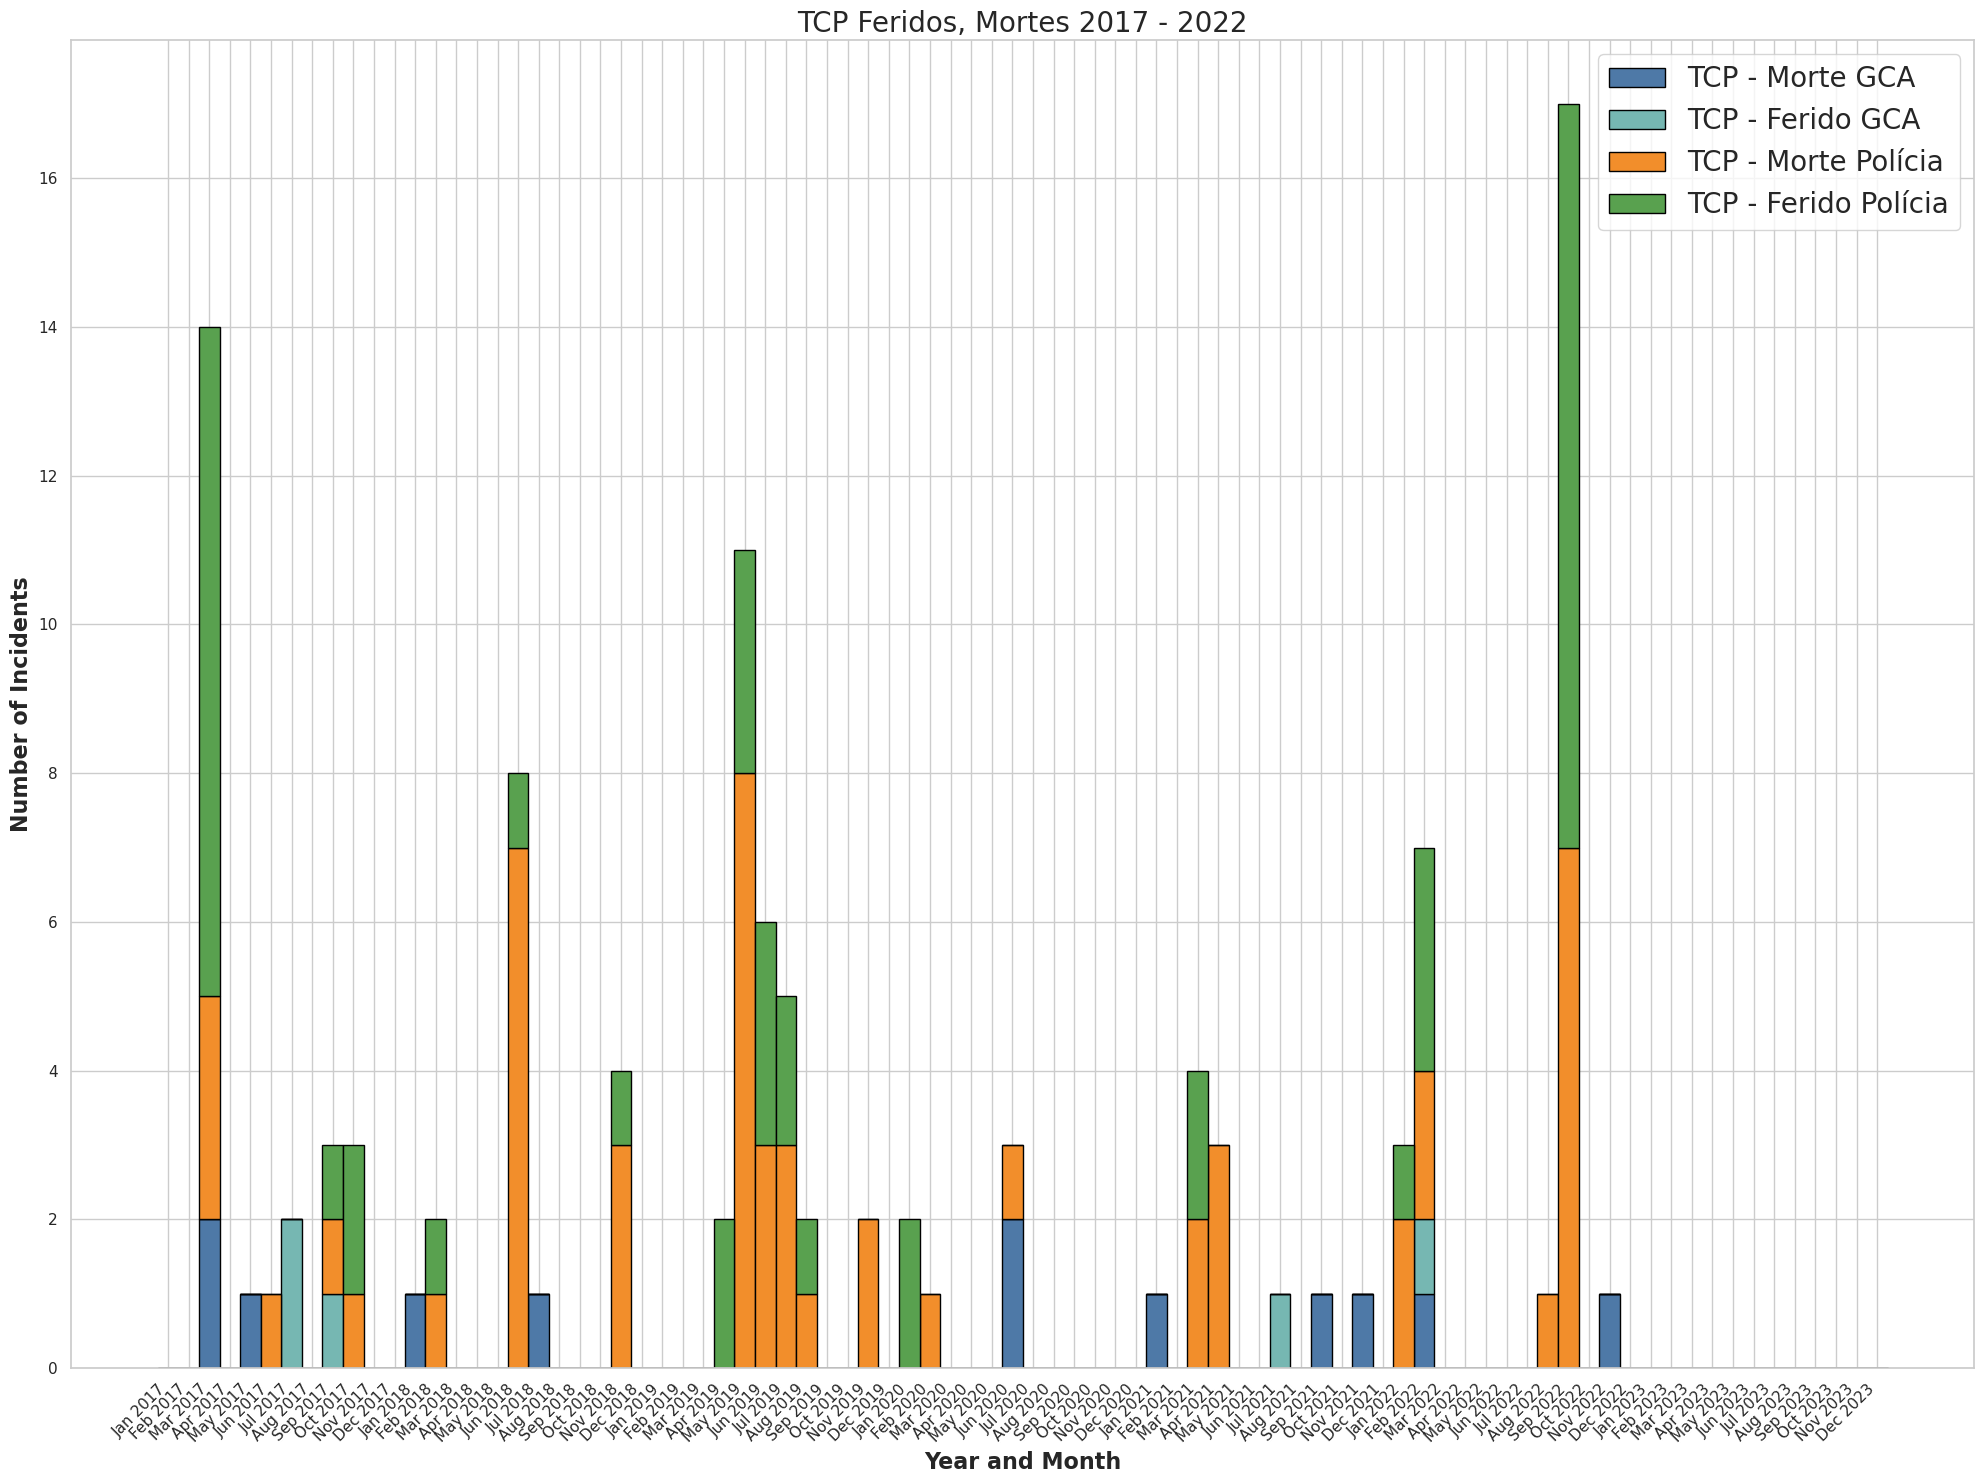

In [62]:
width=1

x = df['yearmo']
y = df['TCP - Morte GCA']
z = df['TCP - Morte Polícia']
k = df['TCP - Ferido GCA']
n = df['TCP - Ferido Polícia']

sns.color_palette("muted")

fig, ax = plt.subplots(figsize=(20, 15))

ax.bar(x, y, color='#4e79a7', width=width, edgecolor='black', label='TCP - Morte GCA')
ax.bar(x, k, bottom=y, color='#76b7b2', width=width, edgecolor='black', label='TCP - Ferido GCA')
ax.bar(x, z, bottom=y + k, color='#f28e2b', width=width, edgecolor='black', label='TCP - Morte Polícia')
ax.bar(x, n, bottom=y + k + z, color='#59a14f', width=width, edgecolor='black', label='TCP - Ferido Polícia')

ax.set_xticks(x)
plt.xticks(rotation=45, ha='right')

plt.xlabel('Year and Month', fontweight='bold', fontsize=16)
plt.ylabel('Number of Incidents', fontweight='bold', fontsize=16)
plt.title('TCP Feridos, Mortes 2017 - 2022', fontsize=20)

plt.legend(fontsize=20)
plt.tight_layout()

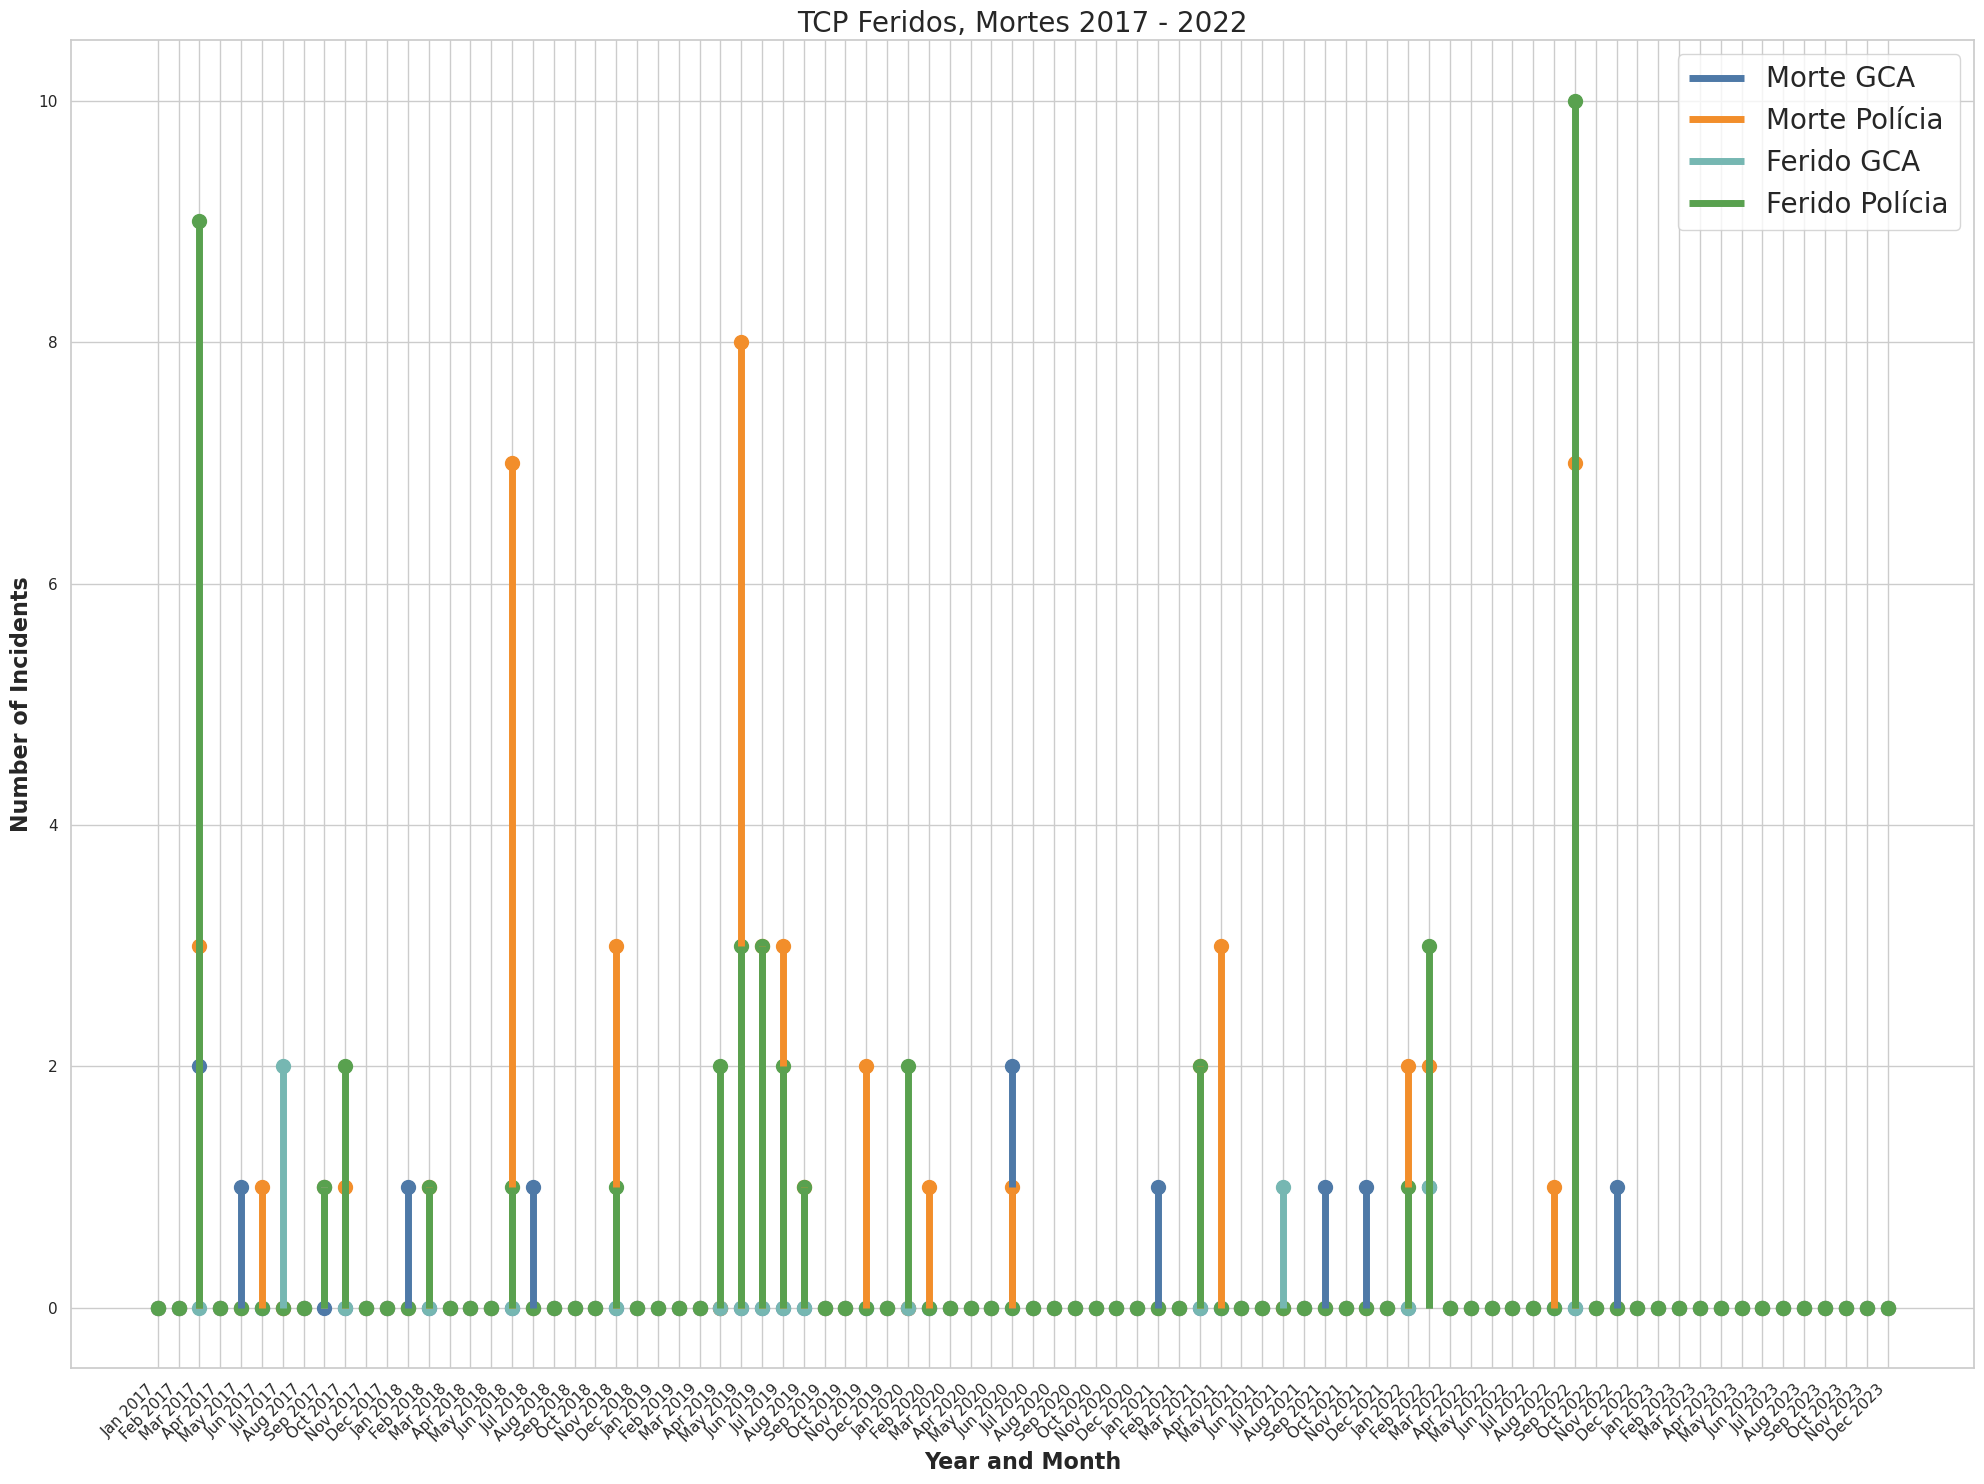

In [63]:
fig, ax = plt.subplots(figsize=(20, 15))

ax.vlines(x, ymin=0, ymax=y, color='#4e79a7', linewidth=5, label='Morte GCA')
ax.vlines(x, ymin=0, ymax=z, color='#f28e2b', linewidth=5, label='Morte Polícia')
ax.vlines(x, ymin=0, ymax=k, color='#76b7b2', linewidth=5, label='Ferido GCA')
ax.vlines(x, ymin=0, ymax=n, color='#59a14f', linewidth=5, label='Ferido Polícia')

ax.scatter(x, y, color='#4e79a7', s=100)
ax.scatter(x, z, color='#f28e2b', s=100)
ax.scatter(x, k, color='#76b7b2', s=100)
ax.scatter(x, n, color='#59a14f', s=100)

plt.xlabel('Year and Month', fontweight='bold', fontsize=16)
plt.ylabel('Number of Incidents', fontweight='bold', fontsize=16)
plt.title('TCP Feridos, Mortes 2017 - 2022', fontsize=20)

ax.set_xticks(x)
plt.xticks(rotation=45, ha='right')

plt.legend(fontsize=20)
plt.tight_layout()
plt.show()